Menu:
1. Graph Coloring
2. Exit
Enter your choice: 1
Enter number of max colours: 3
Enter number of Edges:6
0 1
0 2
0 3
1 2
2 3
3 4
{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 3], 3: [0, 2, 4], 4: [3]}
{0: 'red', 1: 'violet', 2: 'green', 3: 'violet', 4: 'red'}


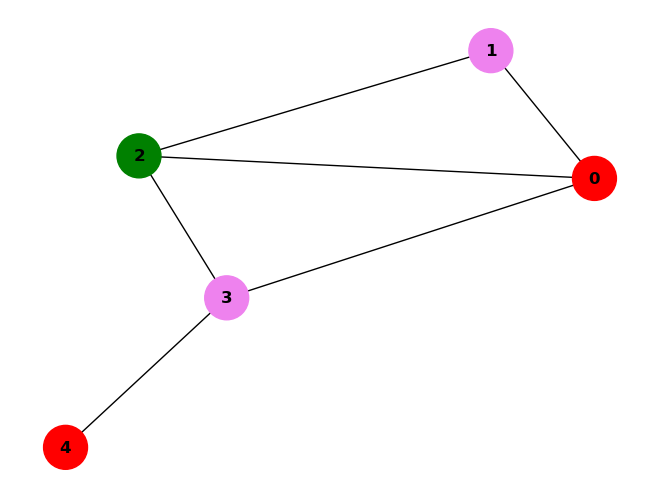

Menu:
1. Graph Coloring
2. Exit
Enter your choice: 2
Exiting...


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def menu():
    print("Menu:")
    print("1. Graph Coloring")
    print("2. Exit")
    choice = input("Enter your choice: ")
    return int(choice)

def graph_coloring():
    m = int(input("Enter number of max colours: "))
    g = {}
    n = int(input("Enter number of Edges:"))
    for i in range(n):
        a, b = map(int, input().split())
        if g.get(a) is None:
            g[a] = []
        g[a].append(b)
        if g.get(b) is None:
            g[b] = []
        g[b].append(a)
    print(g)
    poCol = ["red", "violet", "green", "blue", "yellow", "violet", "orange"]
    def canColour(g, n, col, colList):
        for child in g[n]:
            if colList[child] == poCol[col]:
                return False
        return True
    def graphColouring(g, m, v, n, colList):
        if n == v:
            return True
        for col in range(m):
            if canColour(g, n, col, colList):
                colList[n] = poCol[col]
                if graphColouring(g, m, v, n + 1, colList):
                    return True
                colList[n] = None
    colList = {}
    for i in g.keys():
        colList[i] = None
    if graphColouring(g, m, len(g.keys()), 0, colList):
        print(colList)
        # Draw the graph
        G = nx.Graph()
        for node, neighbors in g.items():
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
        node_colors = [colList[node] for node in G.nodes()]
        nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=12, font_weight='bold')
        plt.show()
    else:
        print(f"Can't colour using {m} colours")

def main():
    while True:
        choice = menu()
        if choice == 1:
            graph_coloring()
        elif choice == 2:
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()

    
    
#Enter your choice: 1
#Enter number of max colours: 3
#Enter number of Edges:6
#0 1
#0 2
#0 3
#1 2
#2 3
#3 4